In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import signal

from filt_plot_funcs import *


In [49]:
with open("aaf_bode_40.csv", "r") as file:
    raw_text = file.readlines()


In [50]:
data = []
for string in raw_text:
    data.append(string.split(','))
    
data = pd.DataFrame(data[1:], columns=data[0], dtype=float)
data.describe()


,Frequency[Hz],Magnitude[dB],GroupDelay[sec]\n
count,299.000000,299.000000,299.000000
mean,30.816146,19.946561,0.002002
std,52.583786,2.634661,0.000363
min,0.100000,6.873469,0.000469
25%,0.698005,20.827855,0.002002
50%,4.871285,20.827935,0.002003
75%,34.001825,20.831764,0.002058
max,237.294174,20.878628,0.002629


In [51]:
f = np.array(data.iloc[:, 0])
Hf = np.array(data.iloc[:, 1])
gd = np.array(data.iloc[:, 2])

fs = 200
f_nyq = fs / 2


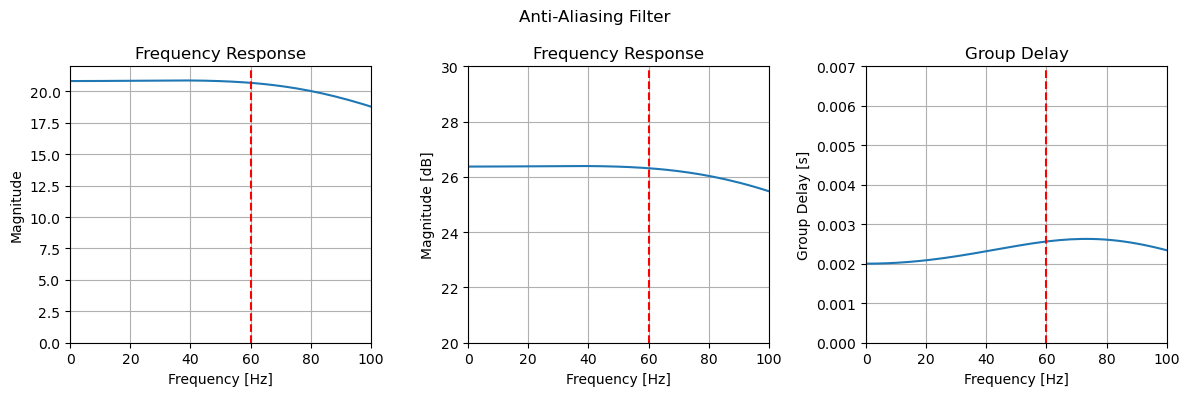

In [52]:
fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=[12, 4])
fig.suptitle("Anti-Aliasing Filter")

plt.sca(axs[0])
plt.plot(f, Hf)
plt.ylim([0, 22])
plt.ylabel("Magnitude")
plt.title("Frequency Response")

plt.sca(axs[1])
plt.plot(f, 20*np.log10(Hf))
plt.ylim([20, 30])
plt.ylabel("Magnitude [dB]")
plt.title("Frequency Response")

plt.sca(axs[2])
plt.plot(f, gd)
plt.ylim([0, 0.007])
plt.ylabel("Group Delay [s]")
plt.title("Group Delay")

for ax in axs:
    plt.sca(ax)
    plt.xlim([0, f_nyq])
    plt.xlabel("Frequency [Hz]")
    plt.axvline(60, linestyle='dashed', color='r')
    plt.grid(True)
